In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7)  # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
# from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("./Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig


Using TensorFlow backend.
./Scripts/plotseqlogo.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
./Scripts/plotseqlogo.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
# add the absolute path of data directory to the path_to_data
path_to_data = "Multi-resBind/Data/"
path_to_datalow = path_to_data + "data_RBPslow_RNAplfold.h5"
X_test_seq_low,X_test_annotation_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_datalow)
print (X_test_seq_low.shape)
print (X_test_annotation_low.shape)
print (X_test_region_low.shape)
print (y_test_RBP_low.shape)
print (y_test_name_low.shape)
print (y_train_low.shape)

(7969, 150, 4)
(7969, 150, 2)
(7969, 250, 4)
(7969, 27)
(7969,)
(56547, 27)


In [3]:
seq_struc = np.concatenate((X_test_seq_low, X_test_annotation_low), axis=2)
print (seq_struc.shape)

(7969, 150, 6)


In [4]:
#load models and obtain prediction and integrated_gradients
# add the absolute path of results directory to the path_to_model
path_to_model = "Multi-resBind/results/input_combination_RNAplfold/"
path_to_model_seq_struc= path_to_model + "m_resbind_input_PU_4_model.h5"

In [5]:
model_seq_struc=load_model(path_to_model_seq_struc, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_struc=model_seq_struc.predict(seq_struc)

Instructions for updating:
Colocations handled automatically by placer.


2021-03-09 22:06:44,468 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2021-03-09 22:06:45,560 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [6]:
igres_resbind= integrated_gradients(model_seq_struc)

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


In [7]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
#number of tasks for each model
num_task_low=len(RBPnames_low)

In [8]:
# one example from the low models, you can change the RBPname to see the attribution map of other RBPs in low models
X_test_seq = X_test_seq_low
X_test_struc = X_test_annotation_low
X_test_region = X_test_region_low
y_test_RBP = y_test_RBP_low

In [9]:
RBPnames = RBPnames_low
pred = pred_seq_struc
igres = igres_resbind

In [ ]:
# plot the Fig.5 (b) in the paper

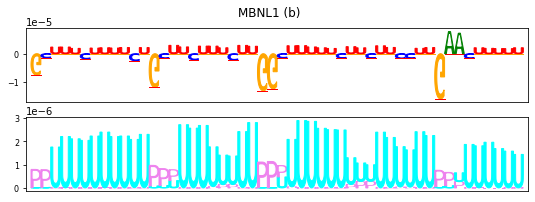

In [15]:
RBPname = "MBNL1"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][1:2]
#print (pred[ind,RBP_index])
ex_seq = np.array([igres.explain(seq_struc[i], outc=RBP_index, reference=False) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, seq_struc[ind])
#from matplotlib.backends.backend_pdf import PdfPages
#pdf = PdfPages('motif_MBNL1_seq_struc_region_zero.pdf')
fig = plt.figure(figsize=(9,3))
ax1 = plt.subplot(2, 1, 1)
seqlogo(np.transpose(seq_log[:, 50:100, :4], axes=(1, 2, 0)), "RNA", ax1)
ax2 = plt.subplot(2, 1, 2)
seqlogo(np.transpose(seq_log[:, 50:100, 4:], axes=(1, 2, 0)), "RNAStruct", ax2)
fig.suptitle('MBNL1 (b)', fontsize=12)
#plt.show()
plt.savefig('MBNL1_seq_struc_contribution_map_b.eps', format='eps',bbox_inches='tight')

[3386]


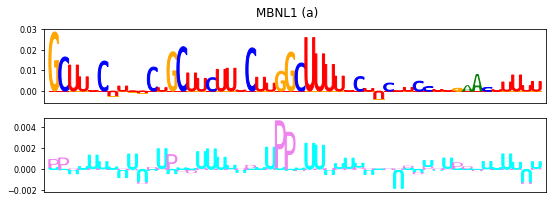

In [14]:
RBPname = "MBNL1"
RBP_index = np.where(RBPnames == RBPname)[0][0]
#print (RBP_index)
ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                  reverse=True) if y_test_RBP[i[0], RBP_index] == 1 and pred[i[0], RBP_index] > 0.50][1:2]
#print (pred[ind,RBP_index])
print (ind)
ref_ind = [i[0] for i in sorted(enumerate(pred[:, RBP_index]), key=lambda x: x[1],
                      reverse=False) if y_test_RBP[i[0], RBP_index] == 0][0:2000]
#print (ref_ind)
ref = np.mean(seq_struc[ref_ind], axis=0)
#print (ref.shape)
ex_seq = np.array([igres.explain(seq_struc[i], outc=RBP_index, reference=ref) for i in ind])
#print (ex_seq.shape)
seq_log = np.multiply(ex_seq, seq_struc[ind])
#from matplotlib.backends.backend_pdf import PdfPages
#pdf = PdfPages('motif_MBNL1_seq_struc_region_zero.pdf')
fig = plt.figure(figsize=(9,3))
ax1 = plt.subplot(2, 1, 1)
seqlogo(np.transpose(seq_log[:, 50:100, :4], axes=(1, 2, 0)), "RNA", ax1)
ax2 = plt.subplot(2, 1, 2)
seqlogo(np.transpose(seq_log[:, 50:100, 4:], axes=(1, 2, 0)), "RNAStruct", ax2)
fig.suptitle('MBNL1 (a)', fontsize=12)
plt.show()
#plt.savefig('MBNL1_seq_struc_contribution_map_a.eps', format='eps',bbox_inches='tight')